In [ ]:
from sys import path
path.append('/Users/Moji/Applications/QUIP/build/darwin_x86_64_gfortran')
from ase.build import bulk
from ase import Atoms
from ase.io.trajectory import Trajectory
from ase.calculators import morse
from quippy.potential import Potential
import os
import numpy as np

In [ ]:
os.chdir('/Users/Moji/Documents/Summer20/Ge/Potentials')
#pot = morse.MorsePotential()
pot2 = Potential(param_filename='Ge_2bSOAP_5000_125_216_d155/Ge_2bSOAP_5000_125_216_d155.xml')
pot = Potential(param_filename='Ge_2bSOAP_5000_125_216/Ge_2bSOAP_5000_5cut.xml')

In [ ]:
a = 5.6858
dia = bulk('Ge', crystalstructure='diamond', a=a, cubic=True)
dia.set_calculator(pot2)
print(dia.get_potential_energy()/len(dia))
cell=dia.get_cell()

In [ ]:
traj = Trajectory('Ge.traj', 'w')

In [114]:
ref = Atoms('Ge', cell=[[20,0,0],[0,20,0],[0,0,20]], pbc=1, calculator=pot)
e0 = ref.get_potential_energy()

In [ ]:
for i in np.linspace(0.9, 1.1, 10):
    dia.set_cell(cell*i, scale_atoms=True)
    dia.get_potential_energy()
    traj.write(dia)

In [115]:
from ase.io import read
from ase.eos import EquationOfState
configs = read('Ge.traj@0:10')
volumes = [dia.get_volume() for dia in configs]
energies = [dia.get_potential_energy() - e0 for dia in configs]

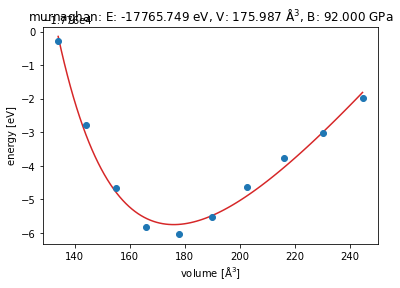

In [116]:
eos = EquationOfState(volumes, energies, eos='murnaghan')
v0, e0, B = eos.fit()
eos.plot('dia-eos.png', show=True)

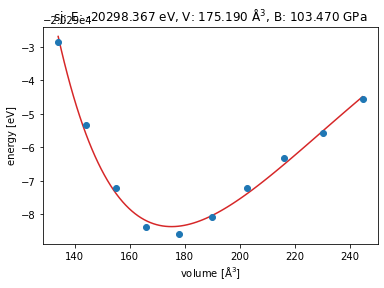

In [113]:
eos = EquationOfState(volumes, energies)
v0, e0, B = eos.fit()
eos.plot('dia-eos.png', show=True)

In [89]:
dia.get_positions()

array([[0.     , 0.     , 0.     ],
       [1.01875, 1.01875, 1.01875]])

In [ ]:
dia.get_distance()
